IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATA

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

NORMALIZATION

In [3]:
def zs_normalization(x):
    mean = np.mean(x, axis = 0)
    std_dev = np.std(x, axis = 0)
    normalized_x = (x - mean)/std_dev
    return normalized_x

EXTRACTING VALUES

In [4]:
x_train = train_data.iloc[:,:-1].values
x_train = zs_normalization(x_train)

x_test = test_data.iloc[:,:-1].values
x_test = zs_normalization(x_test)

y_train = train_data.iloc[:,-1].values
y_test = test_data.iloc[:,-1].values

w = np.zeros(x_train.shape[1])
b = 0

MODEL

In [5]:
def f(x, w, b):
    return np.dot(x, w) + b

COST FUNCTION

In [6]:
def j(x, y, w, b):
    m = len(y)
    y_cap = f(x, w, b)
    sq_error = (y_cap - y)**2
    cost = 1/(m) * np.sum(sq_error)
    return cost

GRADIENT DESCENT

In [8]:
def gradient_descent(x, y, w, b, alpha, itr, reg):
    m = len(y)
    costs = []
    for i in range (itr+1):
        y_cap = f(x, w, b)
        error = (y_cap - y)

        temp_w = (1-(reg/m))*w - (2*alpha/m)*np.dot(error, x)
        temp_b = b - (2*alpha/m)*np.sum(error)

        w = temp_w
        b = temp_b

        cost = j(x, y, w, b)
        costs.append(cost)

        if (i%50 == 0):
            print('itr:',i,' ',costs[i])

        

    plt.plot(range(1,itr+2), costs, marker = 'o', linestyle = '-')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Learning Curve')

    return w, b

ACCURACY

In [12]:
def r2_score(y_true, y_predict):
    y_true_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_true_mean)**2)
    ss_residual = np.sum((y_true - y_predict)**2)
    r2 = 1 - (ss_residual/ss_total)
    return r2

TRAINING

itr: 0   1519384759.974155
itr: 50   1518945962.7667177
itr: 100   1518722885.4822955
itr: 150   1518581519.2469988
itr: 200   1518486380.8613732
itr: 250   1518419225.6112385
itr: 300   1518370046.9856954
itr: 350   1518333013.4172676
itr: 400   1518304524.996755
itr: 450   1518282242.3517911
itr: 500   1518264578.2952726
itr: 550   1518250418.0622613
itr: 600   1518238957.158974
itr: 650   1518229602.5332274
itr: 700   1518221909.5319936
itr: 750   1518215540.0960228
itr: 800   1518210234.147632
itr: 850   1518205789.511228
itr: 900   1518202047.5408404
itr: 950   1518198882.6691167
itr: 1000   1518196194.708989
Training Accuracy: 0.7618849601797157


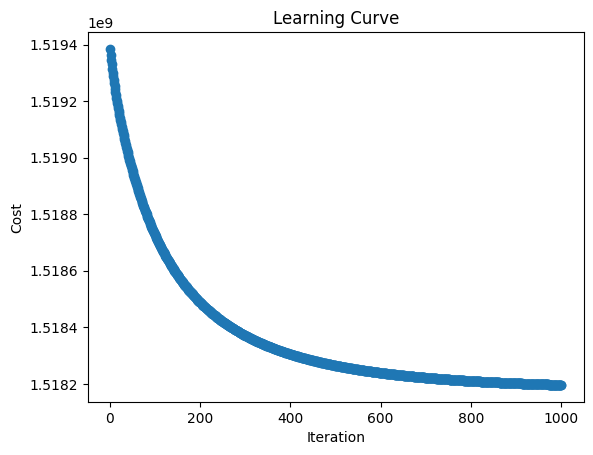

In [17]:
alpha = 0.01
itr = 1000
reg = 0.1

w, b = gradient_descent(x_train, y_train, w, b, alpha, itr, reg)
y_cap_train = f(x_train, w, b)
r2_train = r2_score(y_train, y_cap_train)
print ('Training Accuracy:',r2_train)

TESTING

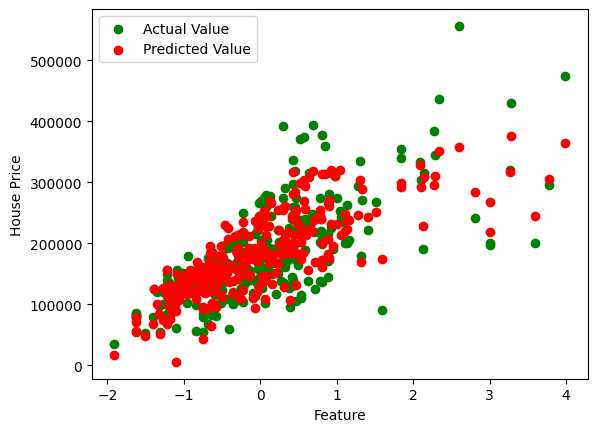

Testing Accuracy: 0.8213485825750683


In [11]:
y_cap_test = f(x_test, w, b)
plt.scatter(x_test[:,1], y_test, label = 'Actual Value', color = 'green')
plt.scatter(x_test[:,1], y_cap_test, label = 'Predicted Value', color = 'red')
plt.xlabel('Feature')
plt.ylabel('House Price')
plt.legend()
plt.show()
r2_test = r2_score(y_test, y_cap_test)
print ('Testing Accuracy:',r2_test)
